# Homework 3 Part 2

**This is an individual assignment.**

---

Write your own code and justify all your answers. You may repurpose any functions built during lecture. You may use ```scikit-learn``` functions.

---

In [ ]:
# Import libraries and magics

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')



# Exercise 1 (10 points)

**Consider the dataset we worked with in class:**

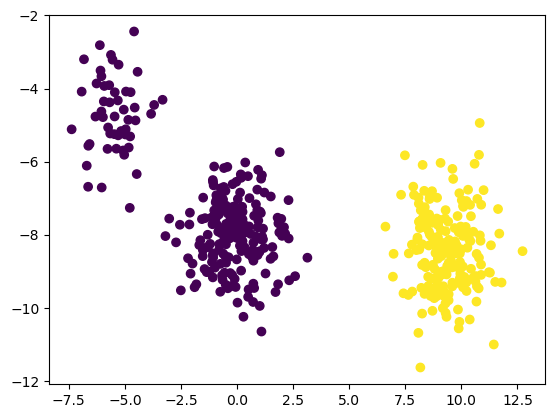

In [5]:
import numpy as np
import matplotlib.pyplot as plt
X = np.load('data.npy')
t = np.load('labels.npy')

plt.scatter(X[:,0], X[:,1], c=t);

1. (8 points) **Solve for the parameters ($\mathbf{w}$ and $w_0$) of the discriminant function you solved for in HW3-Part1-Q1. Plot the corresponding discriminant function.**

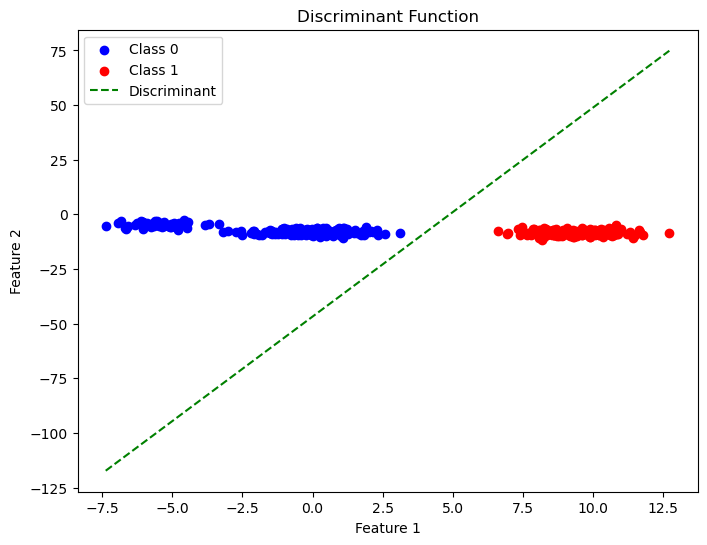

In [7]:
# Separate the classes based on labels
class_0 = X[t == 0]
class_1 = X[t == 1]

# Compute the means of each class
m_0 = np.mean(class_0, axis=0)
m_1 = np.mean(class_1, axis=0)

# Compute the direction vector w (normalized)
w = m_1 - m_0
w = w / np.linalg.norm(w)

# Calculate w0 as the midpoint projection
w0 = -0.5 * np.dot(w, m_1 + m_0)

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(class_0[:, 0], class_0[:, 1], color='blue', label='Class 0')
plt.scatter(class_1[:, 0], class_1[:, 1], color='red', label='Class 1')

# Plot the discriminant line
x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_vals = -(w[0] * x_vals + w0) / w[1]
plt.plot(x_vals, y_vals, color='green', linestyle='--', label='Discriminant')

# Set plot labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Discriminant Function')

plt.show()

2. (2 points) **Compare your solution with the standard LDA discriminant function.**

LDA,the discriminant function aims to find a linealboundary that maximizes the separation between classes by projecting 
data along a direction thatmaximizes the ratio of between-class variance to within-class variance. 

 We used the difference between the means of each class as the direction vectorw without considering within-class variance.
Standard LDA: LDA optimizes the direction by maximizing the between-class variance relative tothe within-class variance.  and LDA adjusts w based on within-class scatter, making it more robust when classeshave significant overlap or differing variances.

# Exercise 2 (35 points)

**In this problem you will be working with the [handwritten digits](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) from ```scikit-learn```. The dataset contains 1797 samples. Each sample is a 64-dimensional vector representing all pixels of a $8\times 8$ grayscale image of a handwritten digit. There are a total of 10 digits (10 targets) and about 180 images per digit. Let's load the data:**

In [70]:
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler 
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from scipy import stats
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

digits = load_digits(return_X_y=False)
# print(digits.DESCR)

In [72]:
X = digits.data # training data
t = digits.target # target values

X.shape, t.shape

((1797, 64), (1797,))

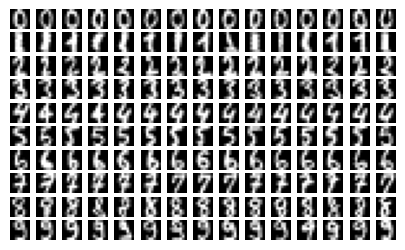

In [74]:
plt.figure(figsize=(5,3))
grid=1
for j in range(10):
    loc = np.where(t==j)[0]
    idx_rd = np.random.choice(loc,15,replace=False)
    for i in range(15):
        plt.subplot(10,15,grid)
        plt.imshow(X[idx_rd[i],:].reshape(8,8), cmap='gray')
        plt.axis('off')
        grid+=1

**Consider the following training-test split and use it for the next set of questions:**

In [76]:
# Partitioning the data into training and test
from sklearn.model_selection import train_test_split

X_train, X_test, t_train, t_test = train_test_split(X, t, stratify=t, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, t_train.shape, t_test.shape

((1437, 64), (360, 64), (1437,), (360,))

1. (2.5 points) **Create a ```Pipeline``` object to train a Logistic Regression classifier (```SGDClassifier```). Make sure to use the proper objective function (parameter ```loss```) and include a scaling step in the pipeline. (An example is available in Lecture 19 Notebook.)**

In [78]:
pipe = Pipeline(steps=[('STD', MinMaxScaler()),('SGD', SGDClassifier(loss='log_loss',random_state=0, eta0=0.05))])

2. (5 points) **Carry experimental design to tune 2 hyperparameters, the learning rate scheduler and the Ridge regularizer parameter. In your grid search object, consider a 10-fold CV scheme.**

In [82]:


param_grid=dict(SGD__alpha=[0.00001,0.0001,0.001,0.01], SGD__learning_rate=['constant','optimal','invscaling','adaptive'])

grid = GridSearchCV(pipe, param_grid, refit=True, verbose=2)

grid.fit(X_train, t_train)

print(grid.best_params_)

final_model = grid.best_estimator_

scores = cross_val_score(final_model, X_train, t_train,
                        scoring='accuracy',
                        cv=KFold(5,shuffle=True, random_state=0))

confidence = 0.95
print('Validation 95% CI = ', stats.t.interval(confidence, len(scores)-1, loc = scores.mean(),
                                     scale=scores.std(ddof=1)/np.sqrt(len(scores))))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ......SGD__alpha=1e-05, SGD__learning_rate=constant; total time=   0.0s
[CV] END ......SGD__alpha=1e-05, SGD__learning_rate=constant; total time=   0.0s
[CV] END ......SGD__alpha=1e-05, SGD__learning_rate=constant; total time=   0.0s
[CV] END ......SGD__alpha=1e-05, SGD__learning_rate=constant; total time=   0.0s
[CV] END ......SGD__alpha=1e-05, SGD__learning_rate=constant; total time=   0.0s
[CV] END .......SGD__alpha=1e-05, SGD__learning_rate=optimal; total time=   0.0s
[CV] END .......SGD__alpha=1e-05, SGD__learning_rate=optimal; total time=   0.0s
[CV] END .......SGD__alpha=1e-05, SGD__learning_rate=optimal; total time=   0.0s
[CV] END .......SGD__alpha=1e-05, SGD__learning_rate=optimal; total time=   0.0s
[CV] END .......SGD__alpha=1e-05, SGD__learning_rate=optimal; total time=   0.0s
[CV] END ....SGD__alpha=1e-05, SGD__learning_rate=invscaling; total time=   0.0s
[CV] END ....SGD__alpha=1e-05, SGD__learning_rat

3. (5 points) **Report performance in test set including accuracy, f1-score and confusion matrices. Compare performances between all classifiers.**

Accuracy in Test: 97.22222222222221 %

f1-score in test: 97.22222222222221 %



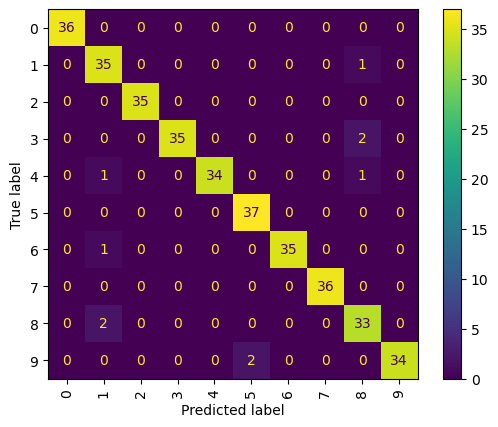

In [94]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_test = final_model.predict(X_test)
print('Accuracy in Test:', accuracy_score(t_test, y_test)*100,'%\n')
print('f1-score in test:',f1_score(t_test,y_test, average='micro')*100,'%\n')

cm= confusion_matrix(t_test, y_test)

disp=ConfusionMatrixDisplay(cm)
disp.plot(xticks_rotation='vertical');

4. (5 points) **Visualize images that were misclassified in test. Provide a discussion on your observations and what procedures could you take to improve results on the bets performing classifier.**

result: 1 : true: 8
result: 8 : true: 4
result: 8 : true: 3
result: 8 : true: 3
result: 5 : true: 9
result: 8 : true: 1
result: 1 : true: 6
result: 5 : true: 9
result: 1 : true: 4
result: 1 : true: 8


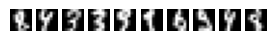

In [96]:
plt.figure(figsize=(5,3))
grid =1
for i in range(y_test.shape[0]):
    if y_test[i] != t_test[i]:
        plt.subplot(1,15,grid)
        plt.imshow(X_test[i,:].reshape(8,8),cmap='gray')
        plt.axis('off')
        grid+=1
        print("result:", y_test[i],": true:", t_test[i])

5. (2.5 points) **Create a ```Pipeline``` object to train a Support Vector Machine classifier (```SVC```). Make sure to include a scaling step in the pipeline.**

In [100]:
pipe=Pipeline(steps=[('STD', MinMaxScaler()),('SVM', SVC(class_weight='balanced',random_state=0))])

6. (5 points) **Carry experimental design to tune 2 hyperparameters, the kernel function and the regularization parameter.  In your grid search object, consider a 10-fold CV scheme.**

In [102]:
param_grid= dict(SVM__C=[0.1,1,5,10], SVM__kernel=['linear','rbf','poly','sigmoid'])
grid=GridSearchCV(pipe,param_grid,refit=True, verbose=2)
grid.fit(X_train, t_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................SVM__C=0.1, SVM__kernel=linear; total time=   0.0s
[CV] END .....................SVM__C=0.1, SVM__kernel=linear; total time=   0.0s
[CV] END .....................SVM__C=0.1, SVM__kernel=linear; total time=   0.0s
[CV] END .....................SVM__C=0.1, SVM__kernel=linear; total time=   0.0s
[CV] END .....................SVM__C=0.1, SVM__kernel=linear; total time=   0.0s
[CV] END ........................SVM__C=0.1, SVM__kernel=rbf; total time=   0.0s
[CV] END ........................SVM__C=0.1, SVM__kernel=rbf; total time=   0.0s
[CV] END ........................SVM__C=0.1, SVM__kernel=rbf; total time=   0.0s
[CV] END ........................SVM__C=0.1, SVM__kernel=rbf; total time=   0.0s
[CV] END ........................SVM__C=0.1, SVM__kernel=rbf; total time=   0.0s
[CV] END .......................SVM__C=0.1, SVM__kernel=poly; total time=   0.0s
[CV] END .......................SVM__C=0.1, SVM_

GridSearchCV(estimator=Pipeline(steps=[('STD', MinMaxScaler()),
                                       ('SVM',
                                        SVC(class_weight='balanced',
                                            random_state=0))]),
             param_grid={'SVM__C': [0.1, 1, 5, 10],
                         'SVM__kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             verbose=2)

7. (5 points) **Report performance in test set including accuracy, f1-score and confusion matrices. Compare performances between all classifiers.**

SVM Test Accuracy: 0.99
SVM Test F1-Score: 0.99

SVM Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.97      1.00      0.99        36
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        37
           4       1.00      1.00      1.00        36
           5       0.97      1.00      0.99        37
           6       1.00      1.00      1.00        36
           7       1.00      1.00      1.00        36
           8       1.00      0.97      0.99        35
           9       1.00      0.97      0.99        36

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



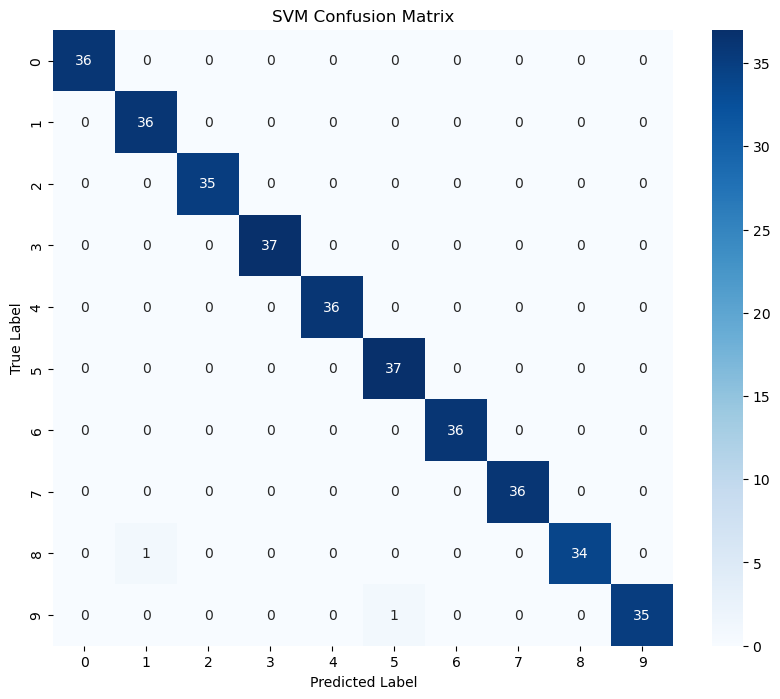

In [106]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

best_svm_pipeline = grid.best_estimator_
best_svm_pipeline.fit(X_train, t_train)

t_pred_svm = best_svm_pipeline.predict(X_test)

accuracy_svm = accuracy_score(t_test, t_pred_svm)
print(f"SVM Test Accuracy: {accuracy_svm:.2f}")

# F1-score
f1_svm = f1_score(t_test, t_pred_svm, average='weighted')
print(f"SVM Test F1-Score: {f1_svm:.2f}")

# report
print("\nSVM Classification Report:\n", classification_report(t_test, t_pred_svm))

# confusion_matrix
conf_matrix_svm = confusion_matrix(t_test, t_pred_svm)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('SVM Confusion Matrix')
plt.show()


8. (5 points) **Visualize images that were misclassified in test. Provide a discussion on your observations and what procedures could you take to improve results on the bets performing classifier.**

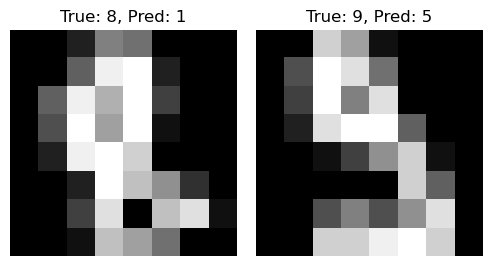

In [108]:
misclassified_indices_svm = np.where(t_test != t_pred_svm)[0]

plt.figure(figsize=(10, 10))
num_samples = 16 
for i, index in enumerate(misclassified_indices_svm[:num_samples]):
    plt.subplot(4, 4, i + 1)
    plt.imshow(X_test[index].reshape(8, 8), cmap='gray')
    plt.title(f"True: {t_test[index]}, Pred: {t_pred_svm[index]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


---

# On-Time (5 points)

Submit your assignment before the deadline.

___

# Submit Your Solution

Confirm that you've successfully completed the assignment.

Along with the Notebook, include a PDF of the notebook with your solutions.

```add``` and ```commit``` the final version of your work, and ```push``` your code to your GitHub repository.

Submit the URL of your GitHub Repository as your assignment submission on Canvas.

___